# KISHAN GUPTA

# Supervised Machine Learning Task
Dataset Link: https://www.kaggle.com/kaushil268/disease-prediction-using-machine-learning

Perform Visualization Task and make use different algorithms to
predict label.

Show at least 3 different Algorithms accuracies with the help of
graph.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Loading the Dataset

In [2]:
df= pd.read_csv(r'C:\Users\Kishan\Desktop\archive\Training.csv',index_col=0)
df.head(20)

skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
itching                                                                    
1                1                     1                    0          0   
0                1                     1                    0          0   
1                0                     1                    0          0   
1                1                     0                    0          0   
1                1                     1                    0          0   
0                1                     1                    0          0   
1                0                     1                    0          0   
1                1                     0                    0          0   
1                1                     1                    0          0   
1                1                     1                    0          0   
0                0                     0                    1          1   
0                0                     0                    0          1   
0                0                     0                    1          0   
0                0                     0                    1          1   
0                0                     0                    1          1   
0                0                     0                    0          1   
0                0                     0                    1          0   
0                0                     0                    1          1   
0                0                     0                    1          1   
0                0                     0                    1          1   

         chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
itching                                                                
1             0           0             0        0                 0   
0             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
0             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
0             1           0             0        0                 0   
0             1           0             0        0                 0   
0             1           0             0        0                 0   
0             0           0             0        0                 0   
0             1           0             0        0                 0   
0             1           0             0        0                 0   
0             1           0             0        0                 0   
0             0           0             0        0                 0   
0             1           0             0        0                 0   
0             1           0             0        0                 0   

         muscle_wasting  ...  scurring  skin_peeling  silver_like_dusting  \
itching                  ...                                                
1                     0  ...         0             0                    0   
0                     0  ...         0             0                    0   
1                     0  ...         0             0                    0   
1                     0  ...         0             0                    0   
1                     0  ...         0             0                    0   
0                     0  ...         0             0                    0   
1                     0  ...         0             0                    0   
1                     0  ...         0             0      

In [3]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))

Numerical Features Count 132


In [4]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
print("Discrete Features Count {}".format(len(discrete_feature)))

Discrete Features Count 132


In [5]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature]
print("Continuous Features Count {}".format(len(continuous_feature)))

Continuous Features Count 0


In [6]:
categorical_feature=[feature for feature in df.columns if feature not in numerical_feature]
print("Categorical Features Count {}".format(len(categorical_feature)))

Categorical Features Count 1


In [7]:
df.drop_duplicates(inplace=True)
df.head(5)

skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
itching                                                                    
1                1                     1                    0          0   
1                0                     1                    0          0   
1                1                     0                    0          0   
1                1                     1                    0          0   
0                0                     0                    1          1   

         chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
itching                                                                
1             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
0             1           0             0        0                 0   

         muscle_wasting  ...  scurring  skin_peeling  silver_like_dusting  \
itching                  ...                                                
1                     0  ...         0             0                    0   
1                     0  ...         0             0                    0   
1                     0  ...         0             0                    0   
1                     0  ...         0             0                    0   
0                     0  ...         0             0                    0   

         small_dents_in_nails  inflammatory_nails  blister  \
itching                                                      
1                           0                   0        0   
1                           0                   0        0   
1                           0                   0        0   
1                           0                   0        0   
0                           0                   0        0   

         red_sore_around_nose  yellow_crust_ooze         prognosis  \
itching                                                              
1                           0                  0  Fungal infection   
1                           0                  0  Fungal infection   
1                           0                  0  Fungal infection   
1                           0                  0  Fungal infection   
0                           0                  0           Allergy   

         Unnamed: 133  
itching                
1                 NaN  
1                 NaN  
1                 NaN  
1                 NaN  
0                 NaN  

[5 rows x 133 columns]

In [8]:
df.dropna(how='all',axis='columns',inplace=True)

# Check Missing Values:

In [9]:
df.isnull().sum()

skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
chills                  0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 132, dtype: int64

In [10]:
#Handle Missing Values
df.isnull().sum()*100/len(df)

skin_rash               0.0
nodal_skin_eruptions    0.0
continuous_sneezing     0.0
shivering               0.0
chills                  0.0
                       ... 
inflammatory_nails      0.0
blister                 0.0
red_sore_around_nose    0.0
yellow_crust_ooze       0.0
prognosis               0.0
Length: 132, dtype: float64

# Shape of Dataset

In [11]:
df.shape

(298, 132)

In [12]:
df.describe()

skin_rash  nodal_skin_eruptions  continuous_sneezing   shivering  \
count  298.000000            298.000000           298.000000  298.000000   
mean     0.130872              0.010067             0.040268    0.013423   
std      0.337828              0.099997             0.196919    0.115270   
min      0.000000              0.000000             0.000000    0.000000   
25%      0.000000              0.000000             0.000000    0.000000   
50%      0.000000              0.000000             0.000000    0.000000   
75%      0.000000              0.000000             0.000000    0.000000   
max      1.000000              1.000000             1.000000    1.000000   

           chills  joint_pain  stomach_pain     acidity  ulcers_on_tongue  \
count  298.000000  298.000000    298.000000  298.000000        298.000000   
mean     0.177852    0.154362      0.033557    0.050336          0.020134   
std      0.383032    0.361904      0.180389    0.219004          0.140696   
min      0.000000    0.000000      0.000000    0.000000          0.000000   
25%      0.000000    0.000000      0.000000    0.000000          0.000000   
50%      0.000000    0.000000      0.000000    0.000000          0.000000   
75%      0.000000    0.000000      0.000000    0.000000          0.000000   
max      1.000000    1.000000      1.000000    1.000000          1.000000   

       muscle_wasting  ...  pus_filled_pimples  blackheads    scurring  \
count      298.000000  ...          298.000000  298.000000  298.000000   
mean         0.013423  ...            0.013423    0.013423    0.013423   
std          0.115270  ...            0.115270    0.115270    0.115270   
min          0.000000  ...            0.000000    0.000000    0.000000   
25%          0.000000  ...            0.000000    0.000000    0.000000   
50%          0.000000  ...            0.000000    0.000000    0.000000   
75%          0.000000  ...            0.000000    0.000000    0.000000   
max          1.000000  ...            1.000000    1.000000    1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count    298.000000           298.000000            298.000000   
mean       0.020134             0.020134              0.020134   
std        0.140696             0.140696              0.140696   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails     blister  red_sore_around_nose  yellow_crust_ooze  
count          298.000000  298.000000            298.000000         298.000000  
mean             0.020134    0.016779              0.016779           0.016779  
std              0.140696    0.128657              0.128657           0.128657  
min              0.000000    0.000000              0.000000           0.000000  
25%              0.000000    0.000000              0.000000           0.000000  
50%              0.000000    0.000000              0.000000           0.000000  
75%              0.000000    0.000000              0.000000           0.000000  
max              1.000000    1.000000              1.000000           1.000000  

[8 rows x 131 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 1 to 0
Columns: 132 entries, skin_rash to prognosis
dtypes: int64(131), object(1)
memory usage: 309.6+ KB


# HeatMap

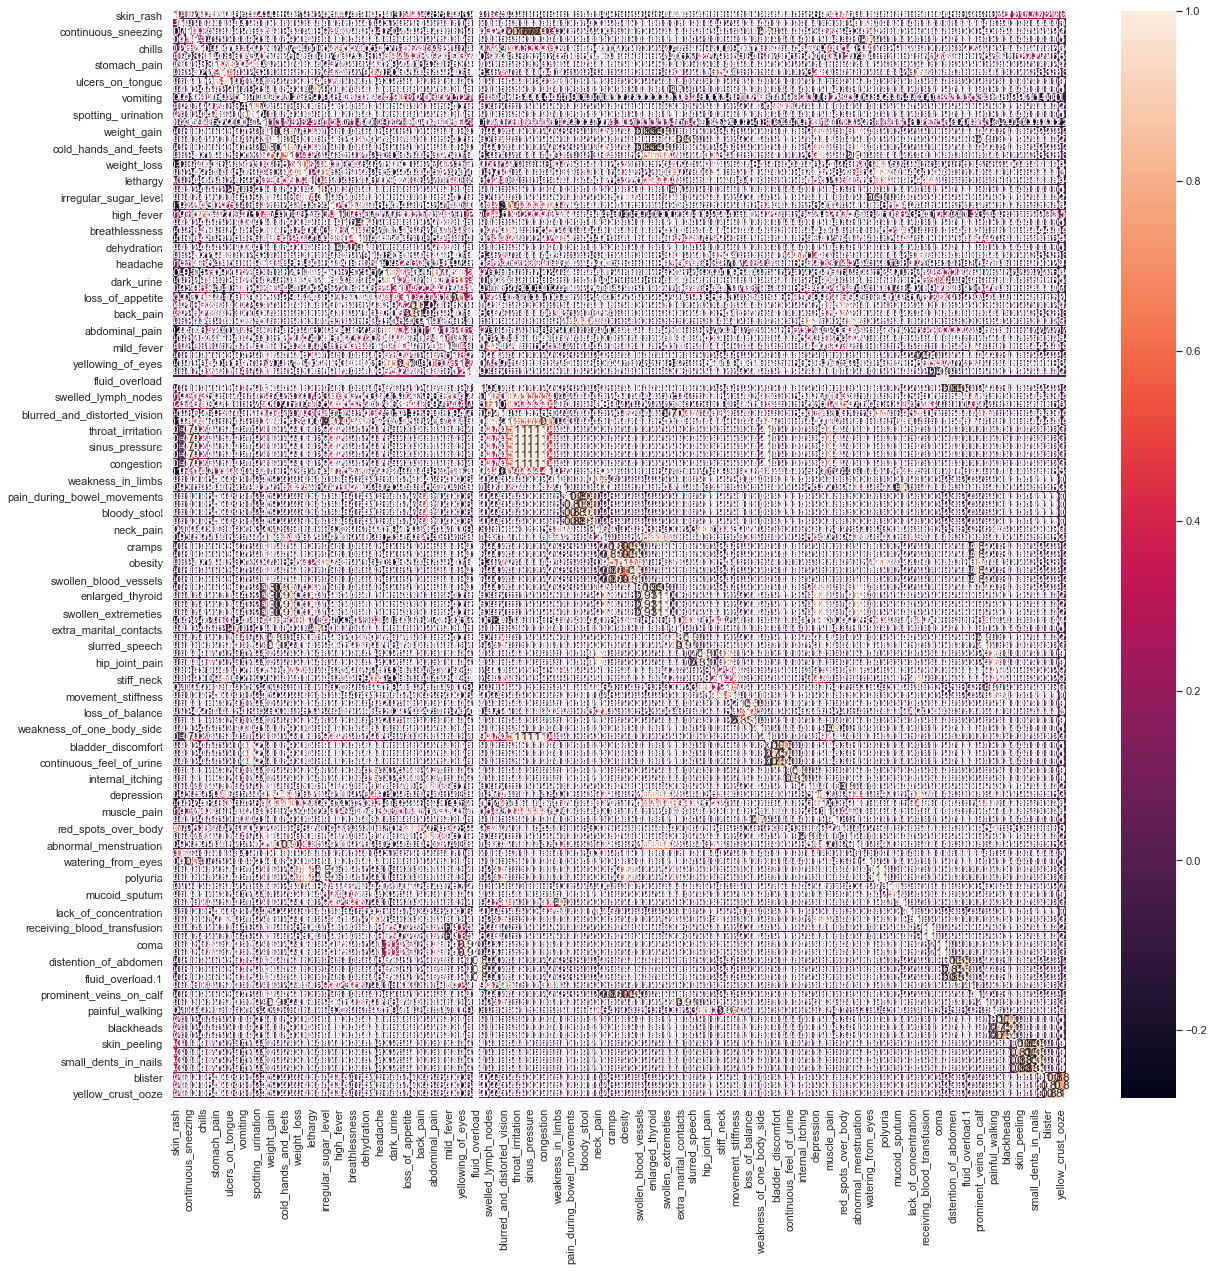

In [14]:
kul=df.corr(method ='spearman')
plt.figure(figsize=(20,20))   #ploting map
g=sns.heatmap(kul, annot=True)

# Distplot

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


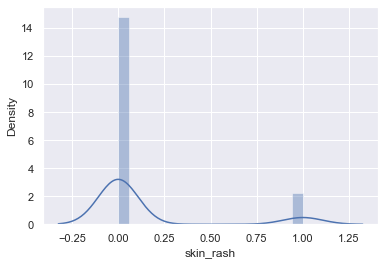

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


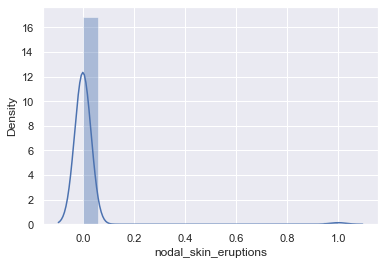

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


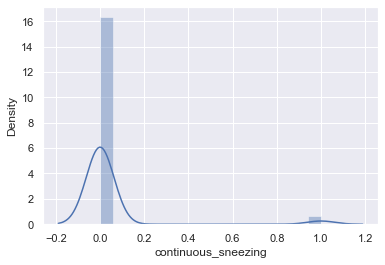

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


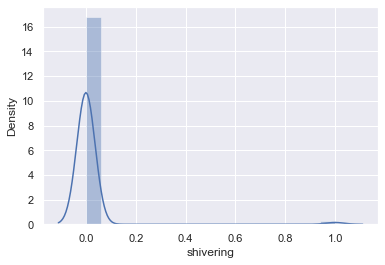

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


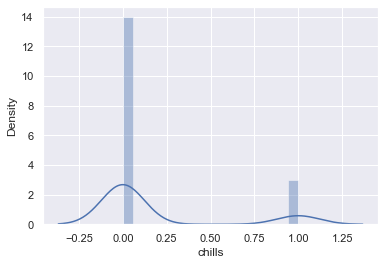

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


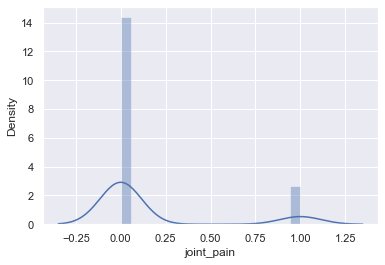

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


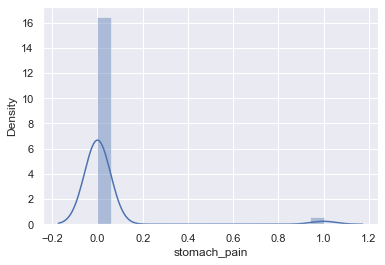

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


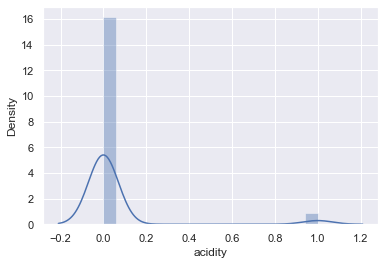

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


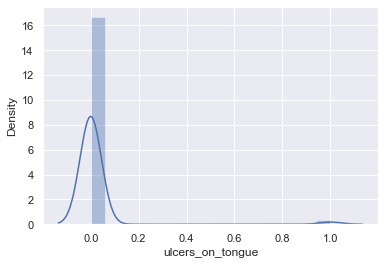

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


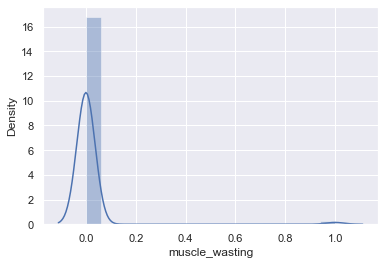

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


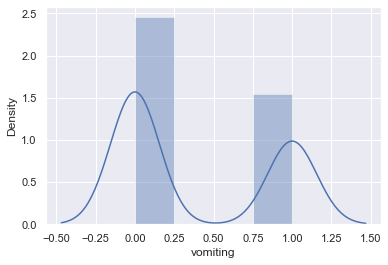

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


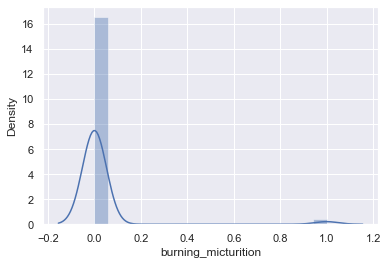

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


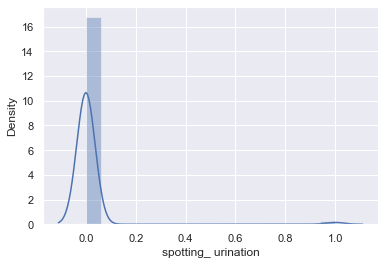

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


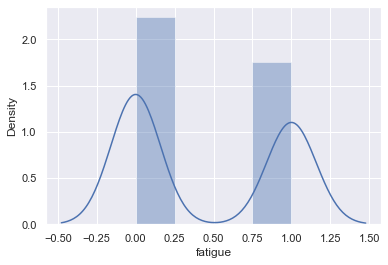

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


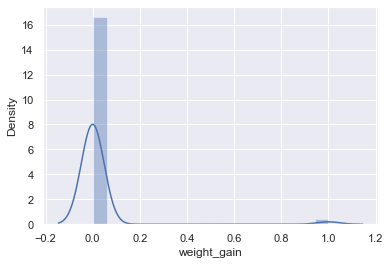

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


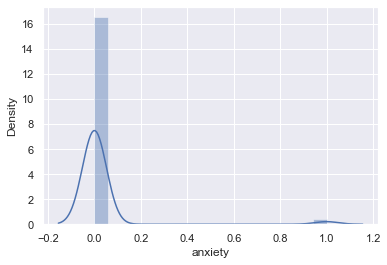

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


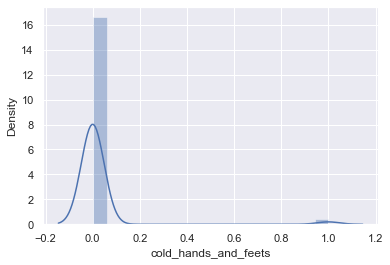

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


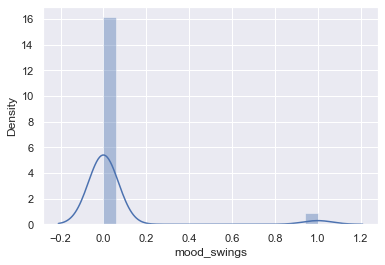

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


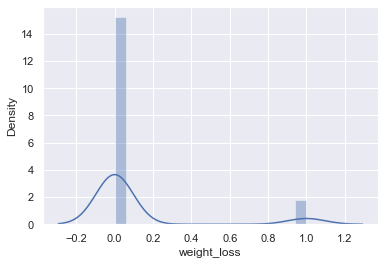

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


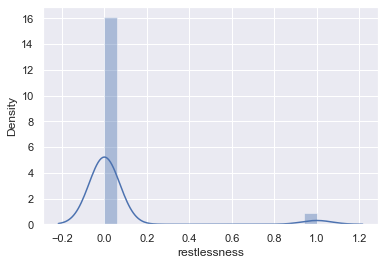

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


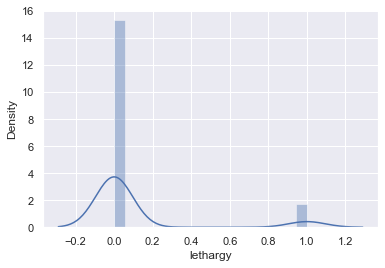

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


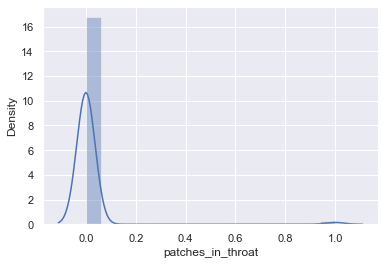

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


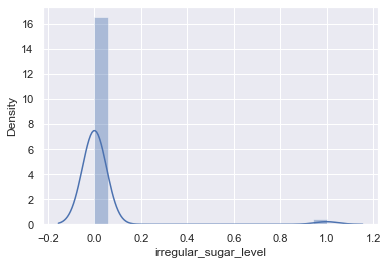

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


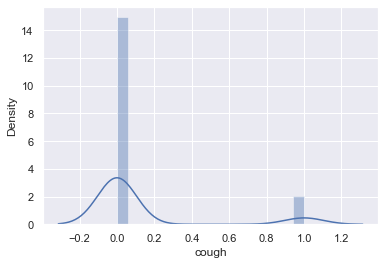

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


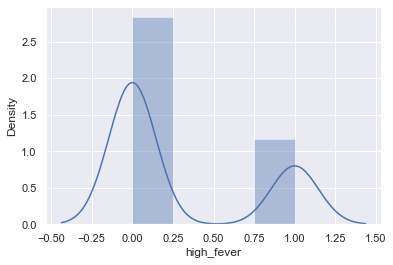

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


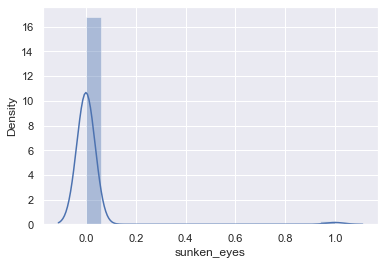

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


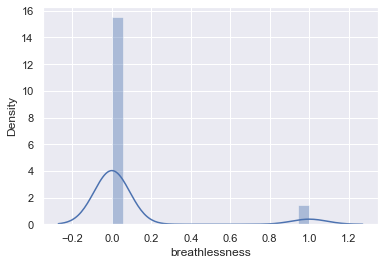

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


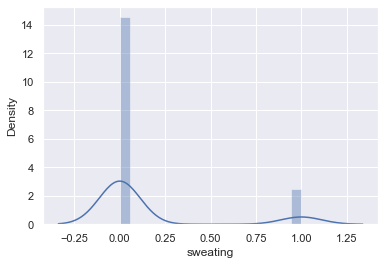

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


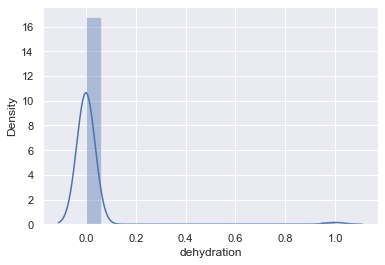

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


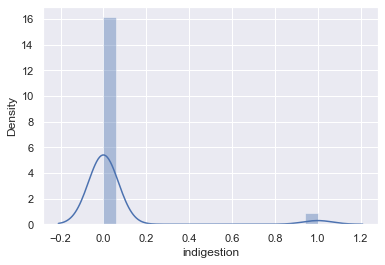

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


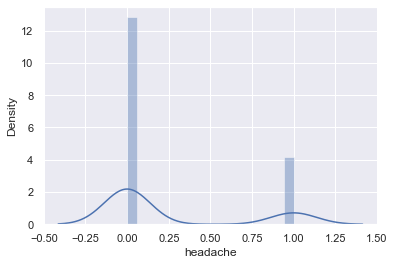

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


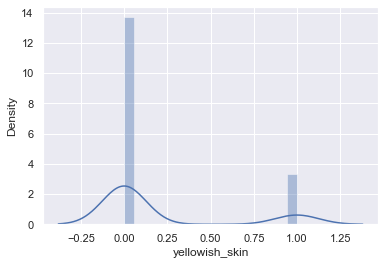

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


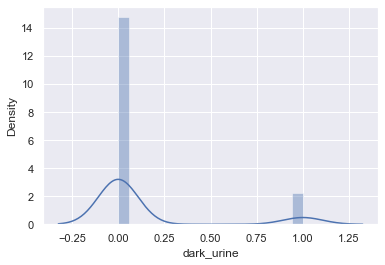

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


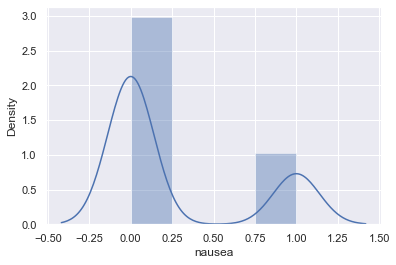

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


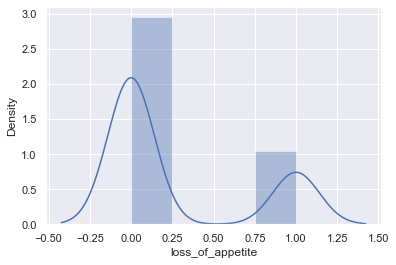

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


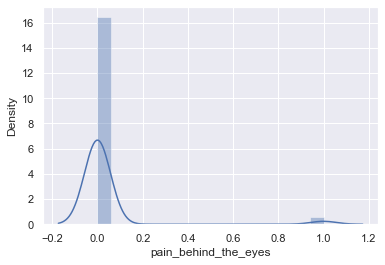

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


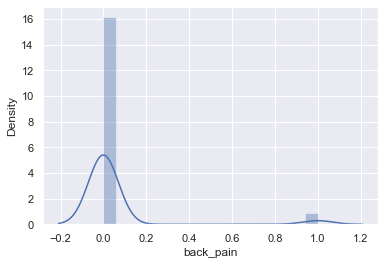

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


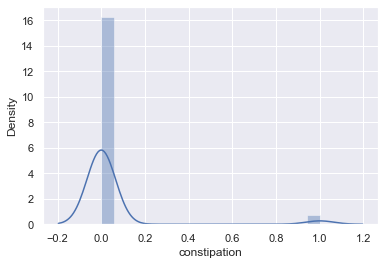

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


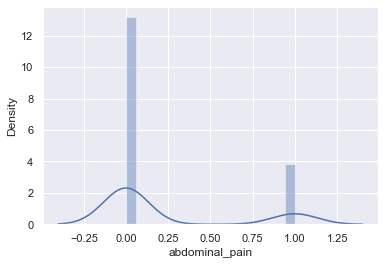

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


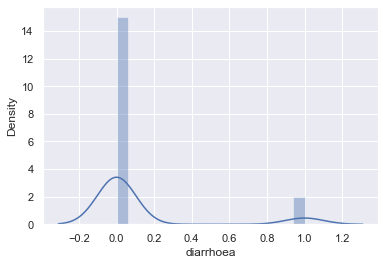

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


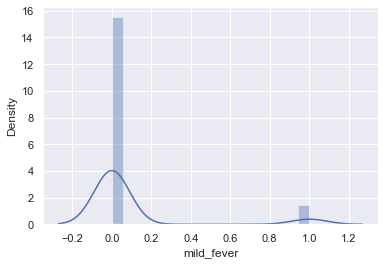

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


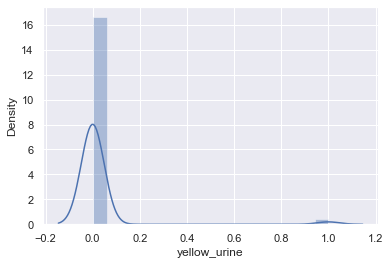

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


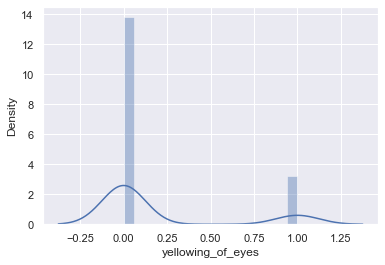

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


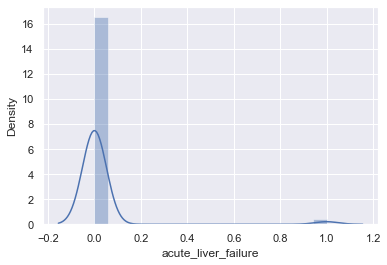

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


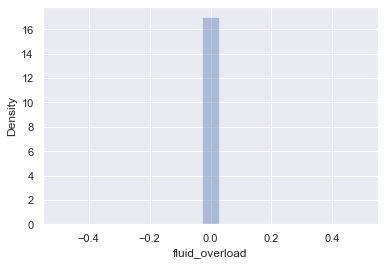

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


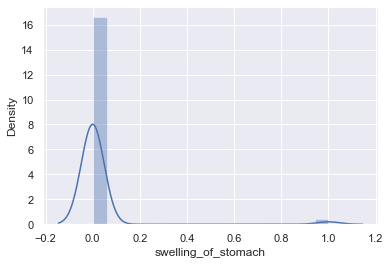

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


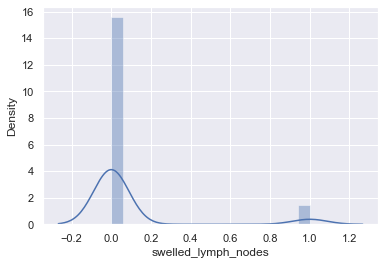

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


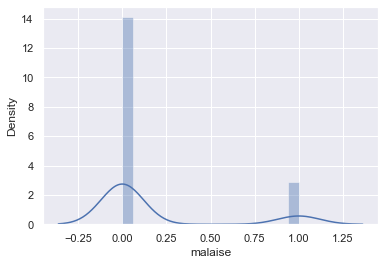

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


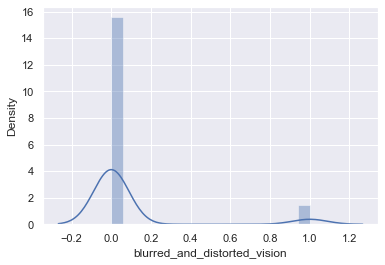

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


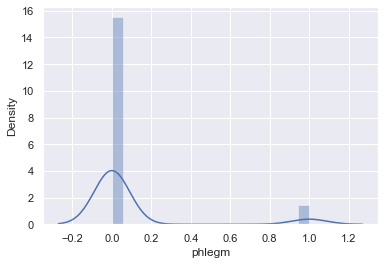

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


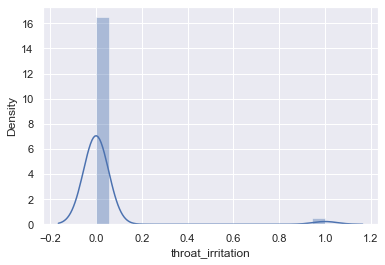

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


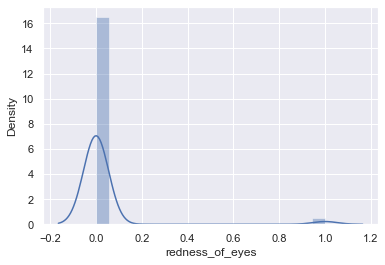

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


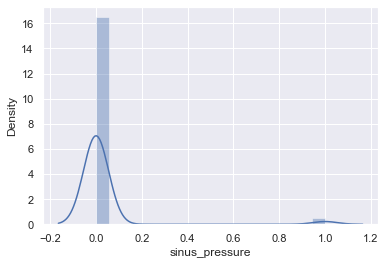

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


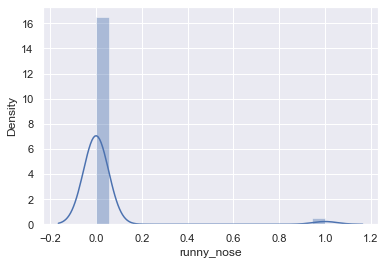

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


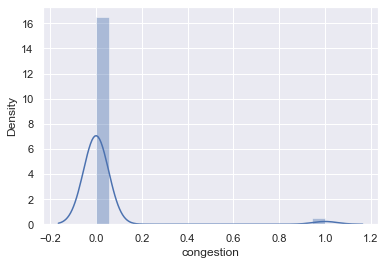

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


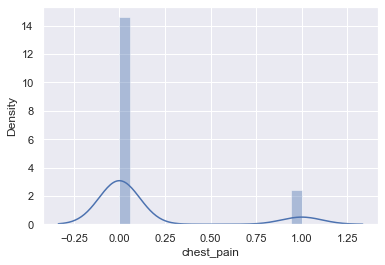

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


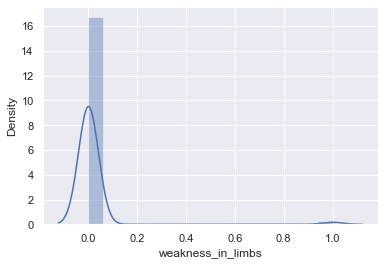

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


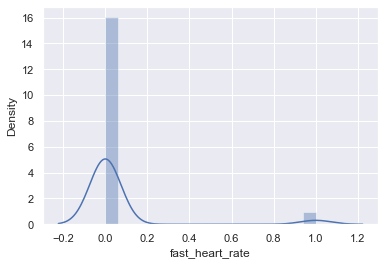

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


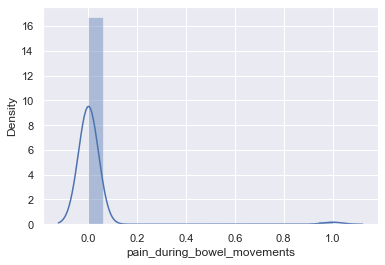

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


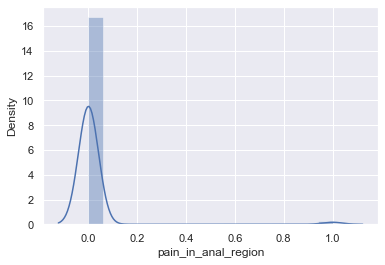

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


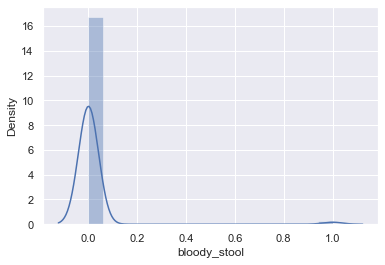

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


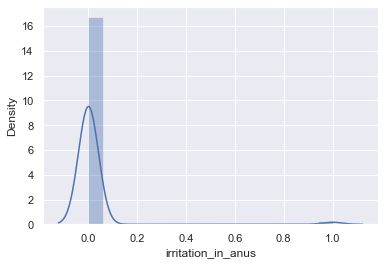

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


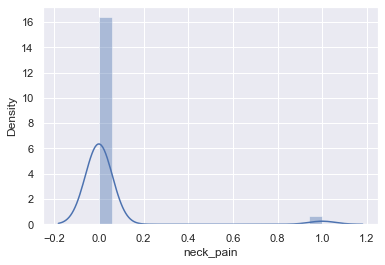

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


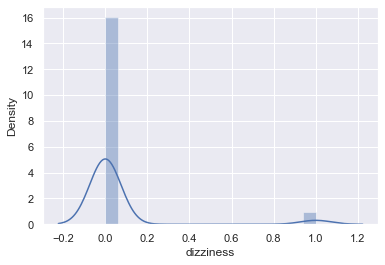

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


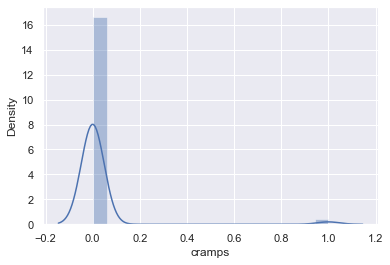

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


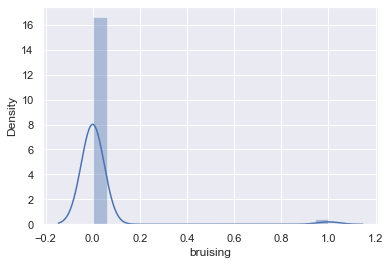

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


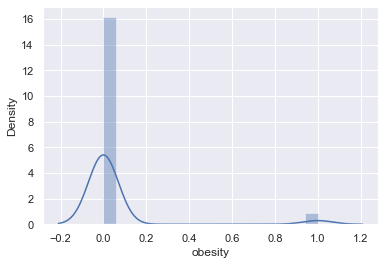

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


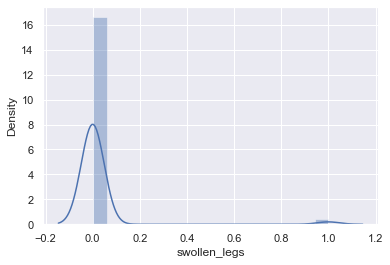

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


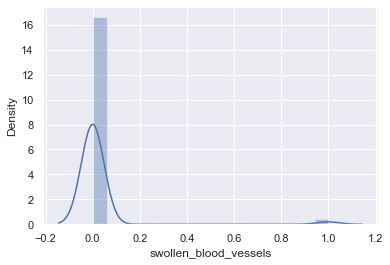

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


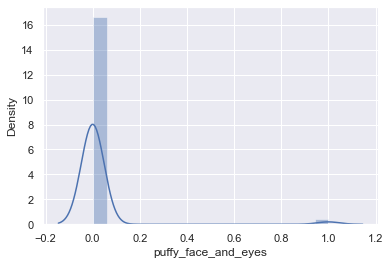

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


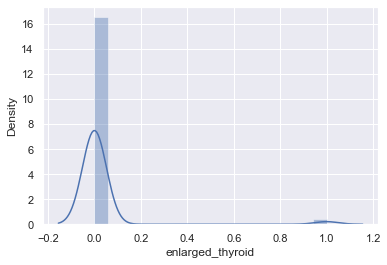

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


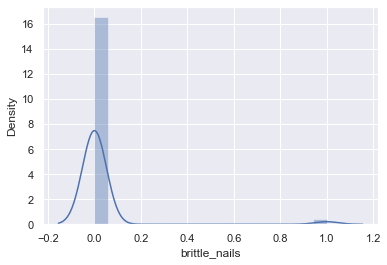

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


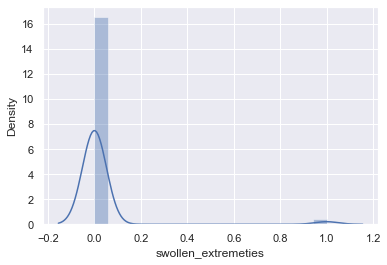

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


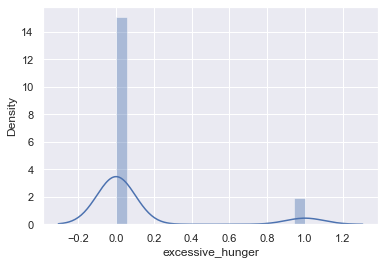

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


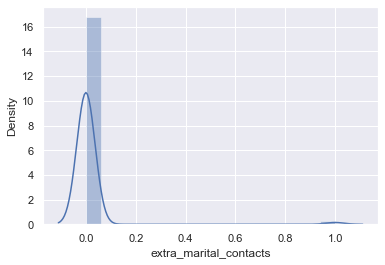

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


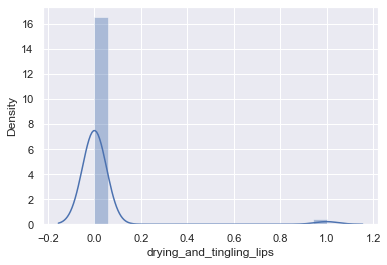

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


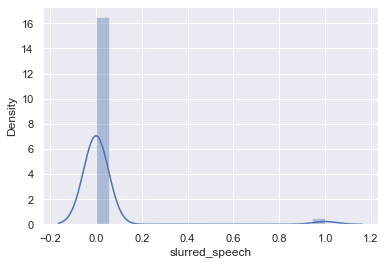

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


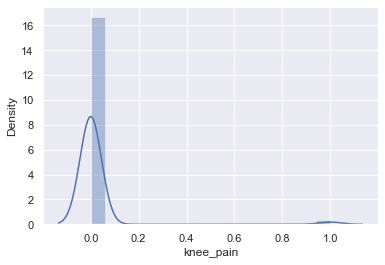

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


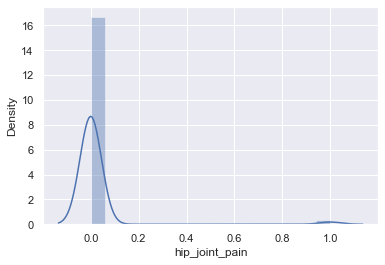

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


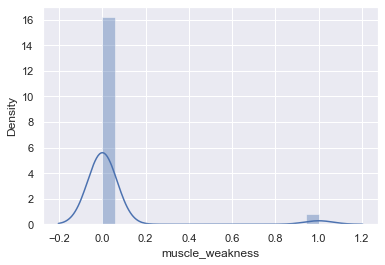

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


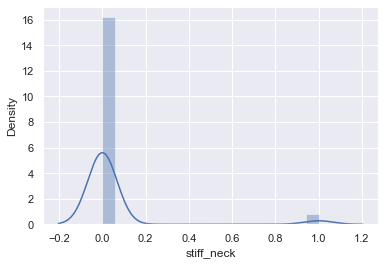

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


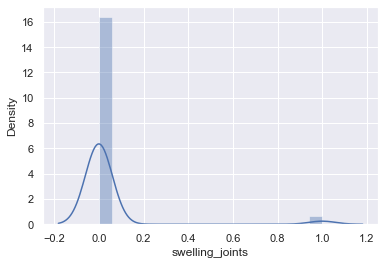

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


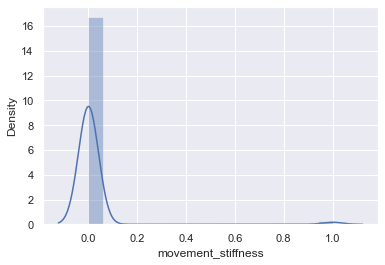

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


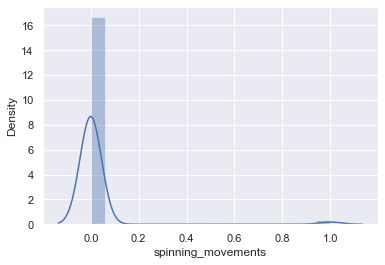

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


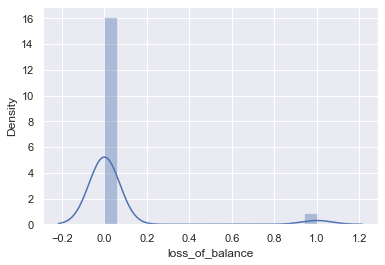

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


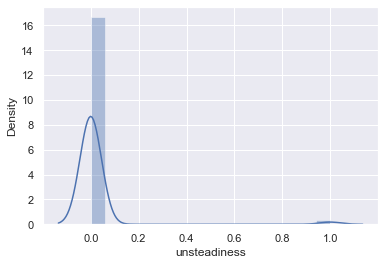

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


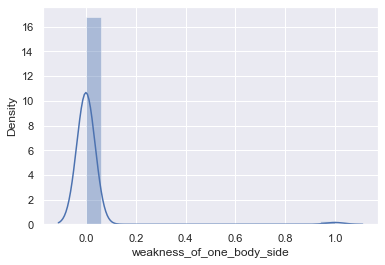

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


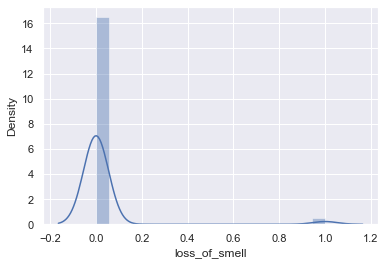

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


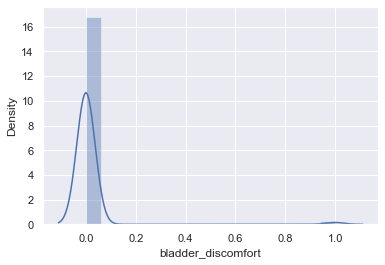

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


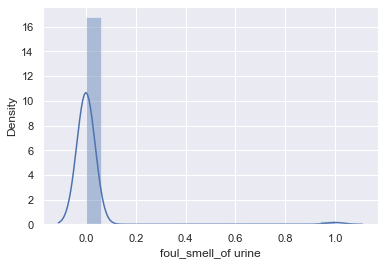

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


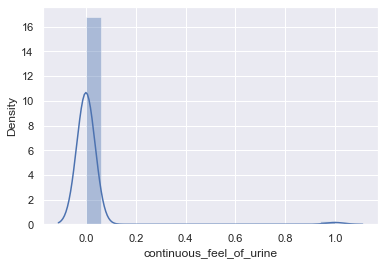

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


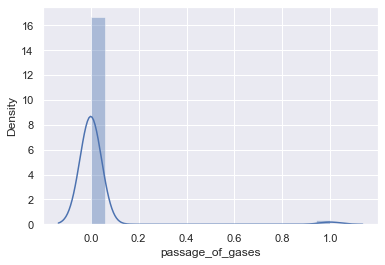

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


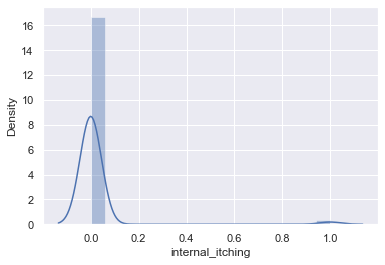

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


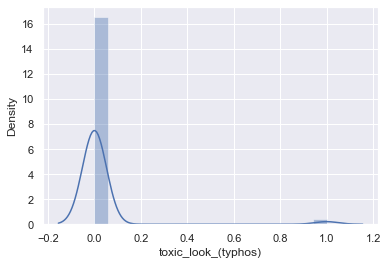

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


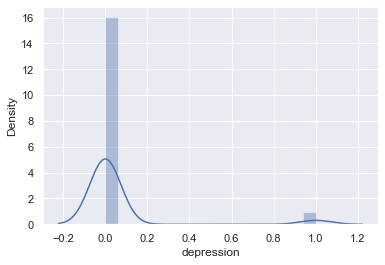

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


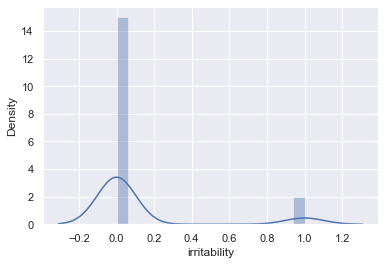

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


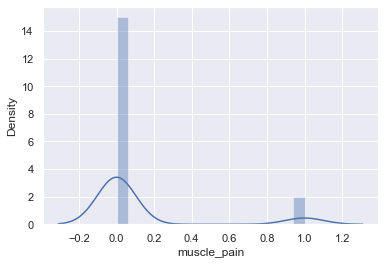

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


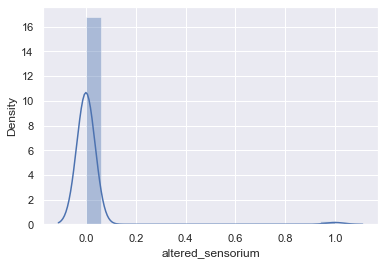

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


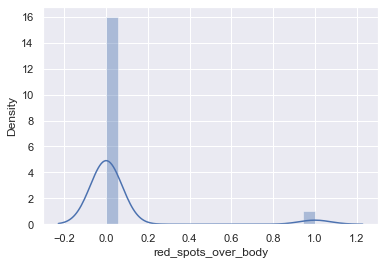

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


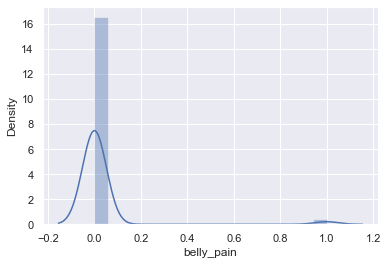

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


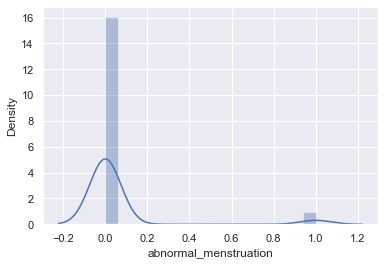

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


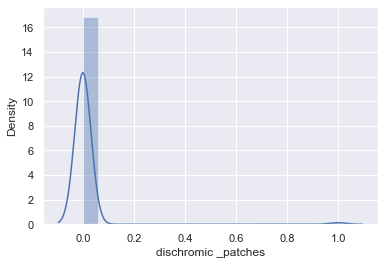

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


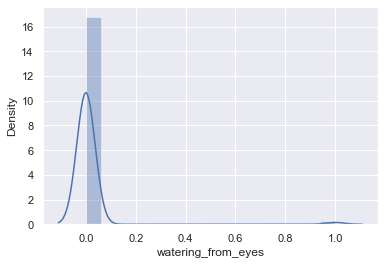

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


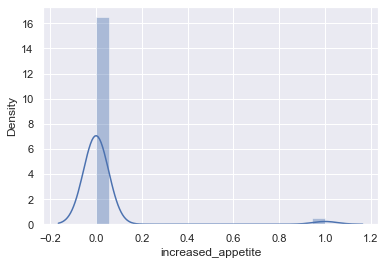

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


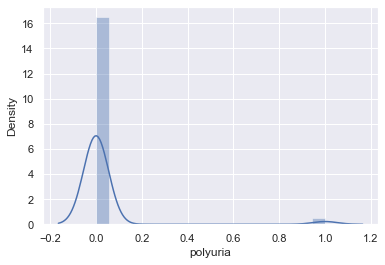

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


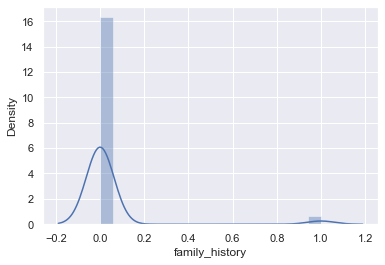

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


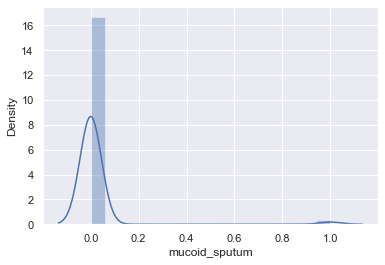

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


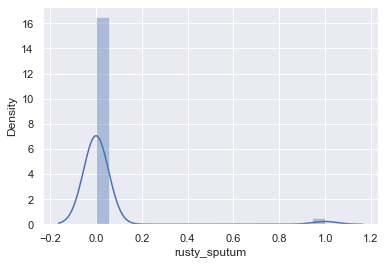

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


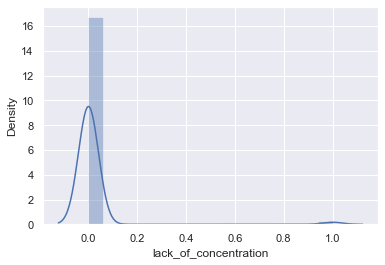

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


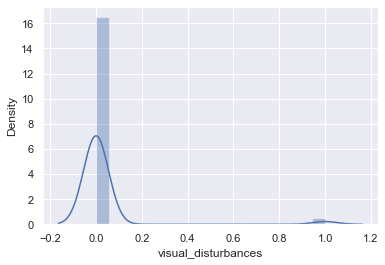

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


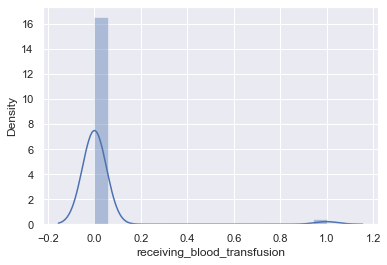

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


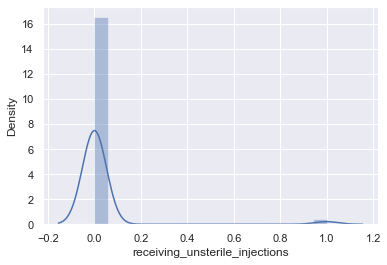

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


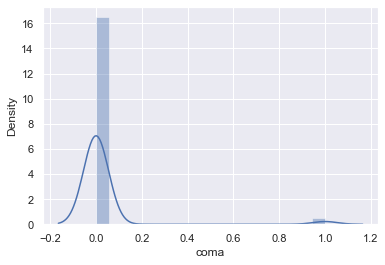

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


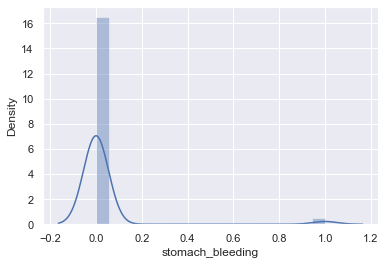

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


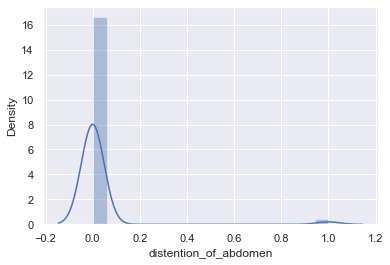

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


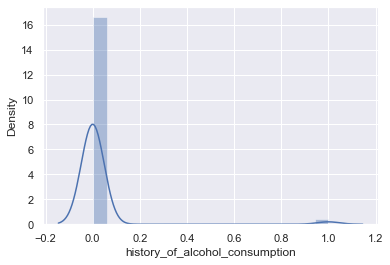

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


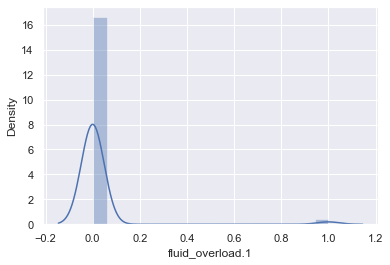

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


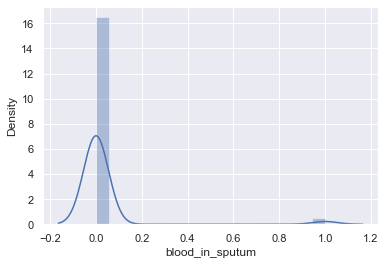

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


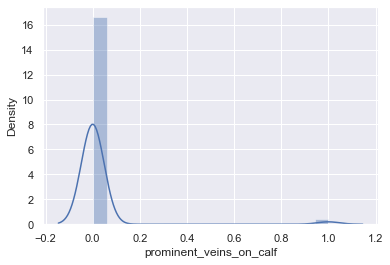

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


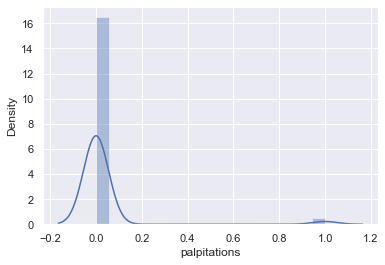

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


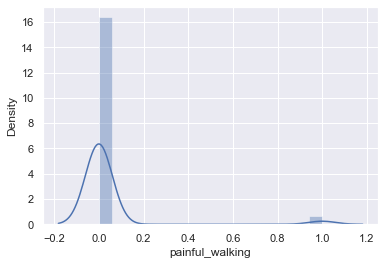

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


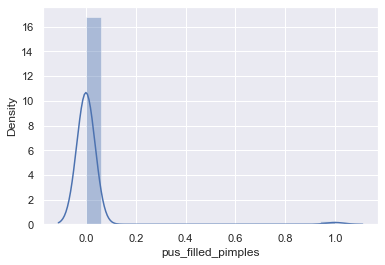

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


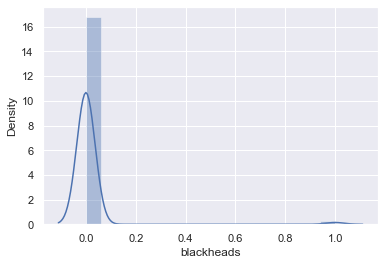

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


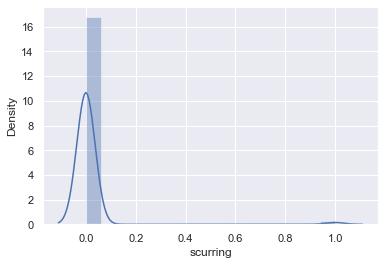

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


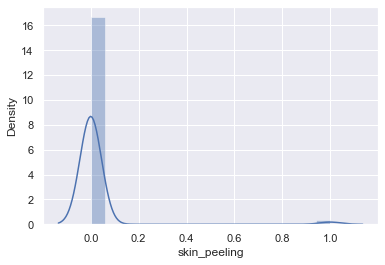

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


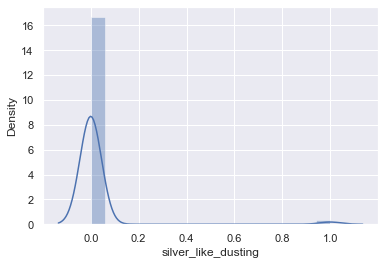

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


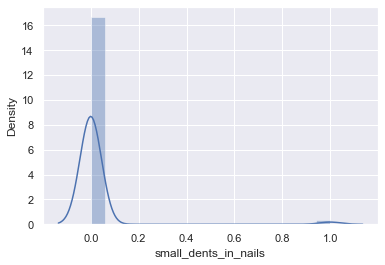

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


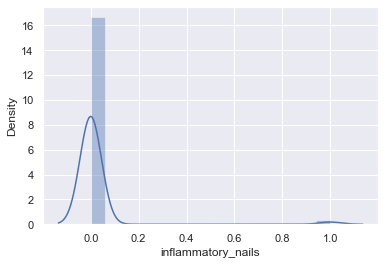

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


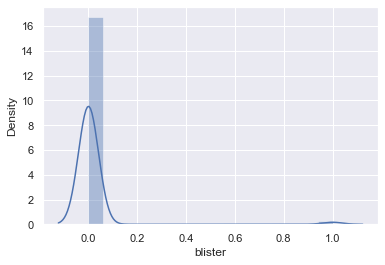

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


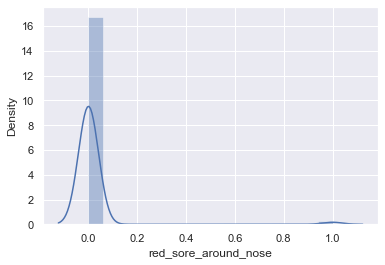

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


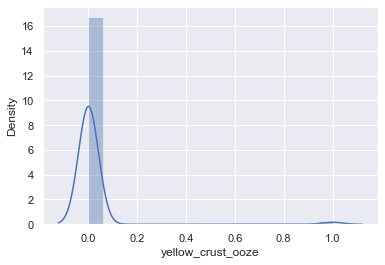

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'Fungal infection'

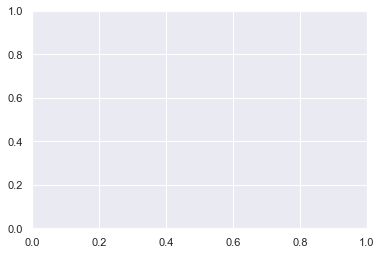

In [15]:
df_feature=df.columns

for feature in df_feature:
    p=sns.distplot(a=df[feature])
    plt.show()

# Histogram Plot

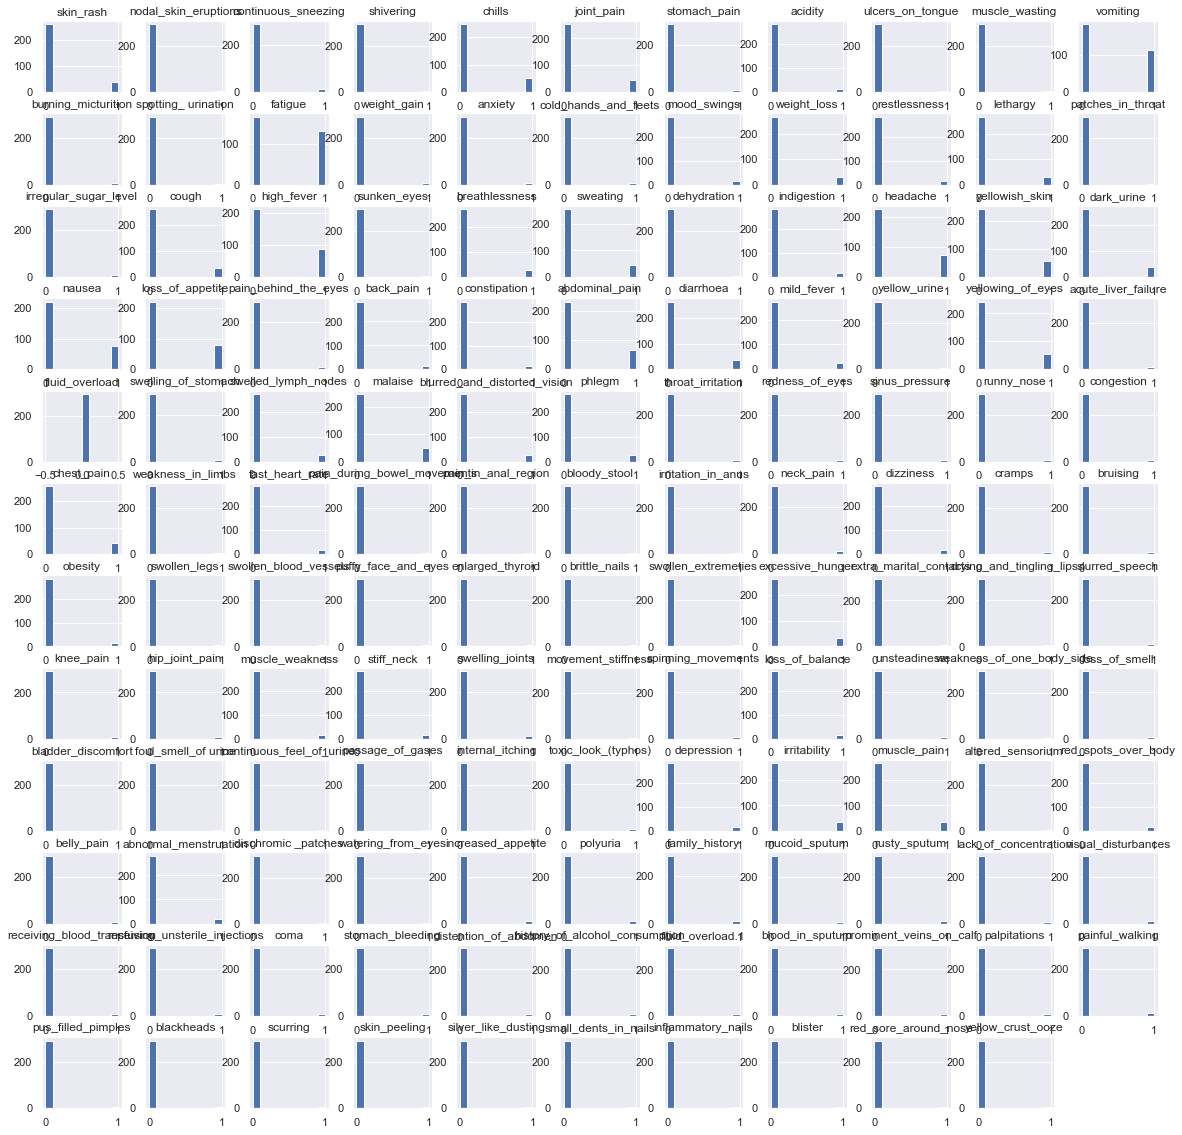

In [16]:
k=df.hist(figsize=(20,20))

# Scatter Plot

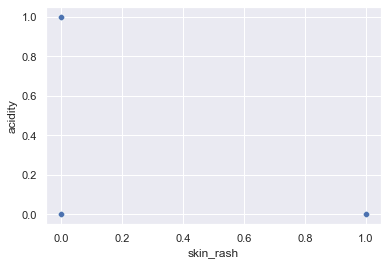

In [17]:
km= sns.scatterplot(x ='skin_rash', y='acidity',data=df)

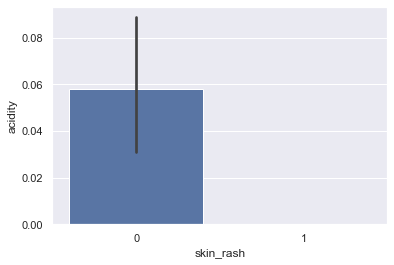

In [18]:
km1= sns.barplot(x='skin_rash',y='acidity',data=df)

# Box Plot

<AxesSubplot:>

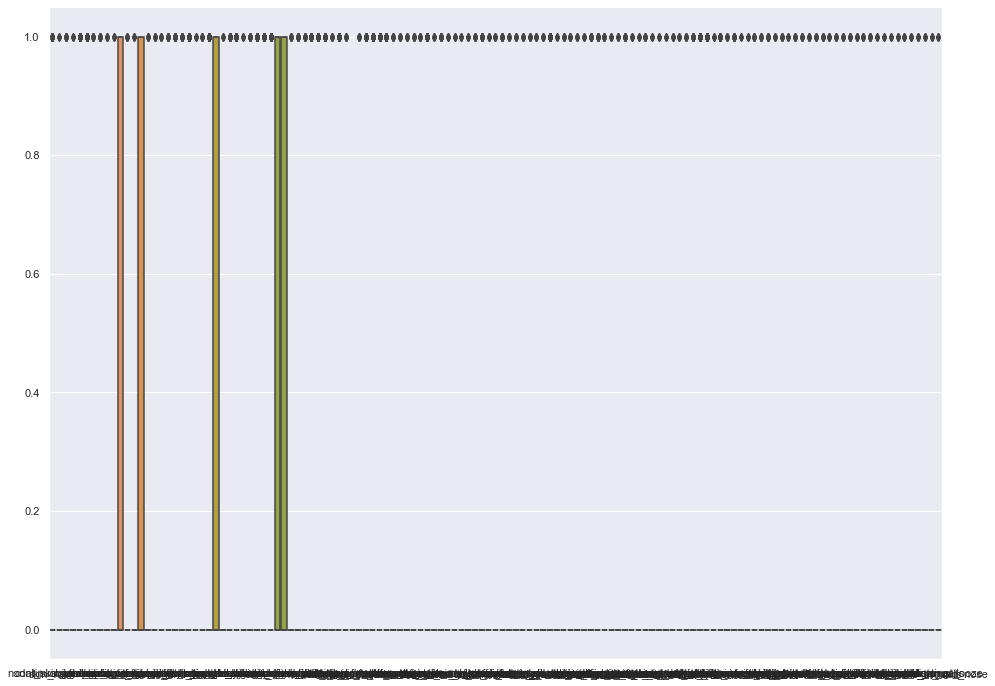

In [19]:
plt.figure(figsize=(16,12))
sns.boxplot(data=df)

# Pie Chart

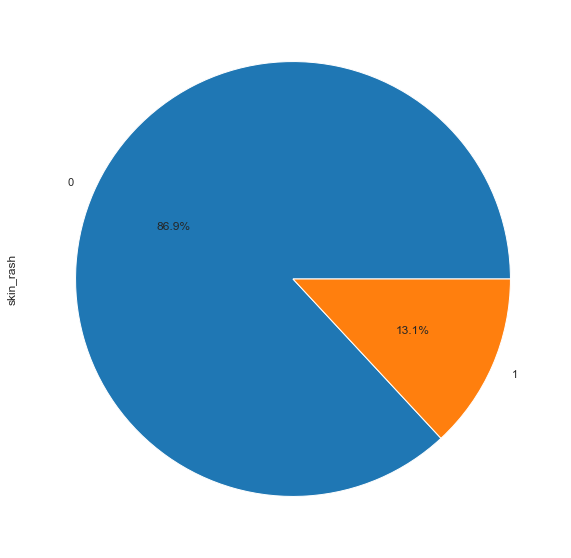

In [20]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]    
ks=df['skin_rash'].value_counts(ascending=False).plot.pie(colors=colors,autopct='%1.1f%%',figsize=(15,10))
plt.show()

# Join Plot

<Figure size 1152x864 with 0 Axes>

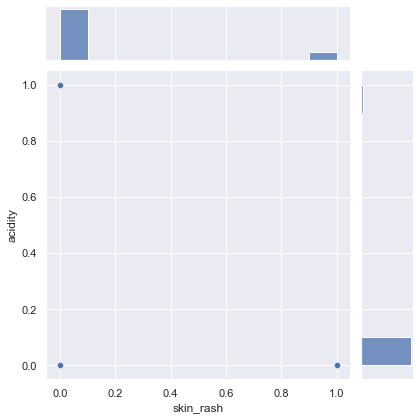

In [21]:
plt.figure(figsize=(16,12))
sns.jointplot(x='skin_rash',y='acidity',data=df)

# Density Plot

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='skin_rash', ylabel='acidity'>

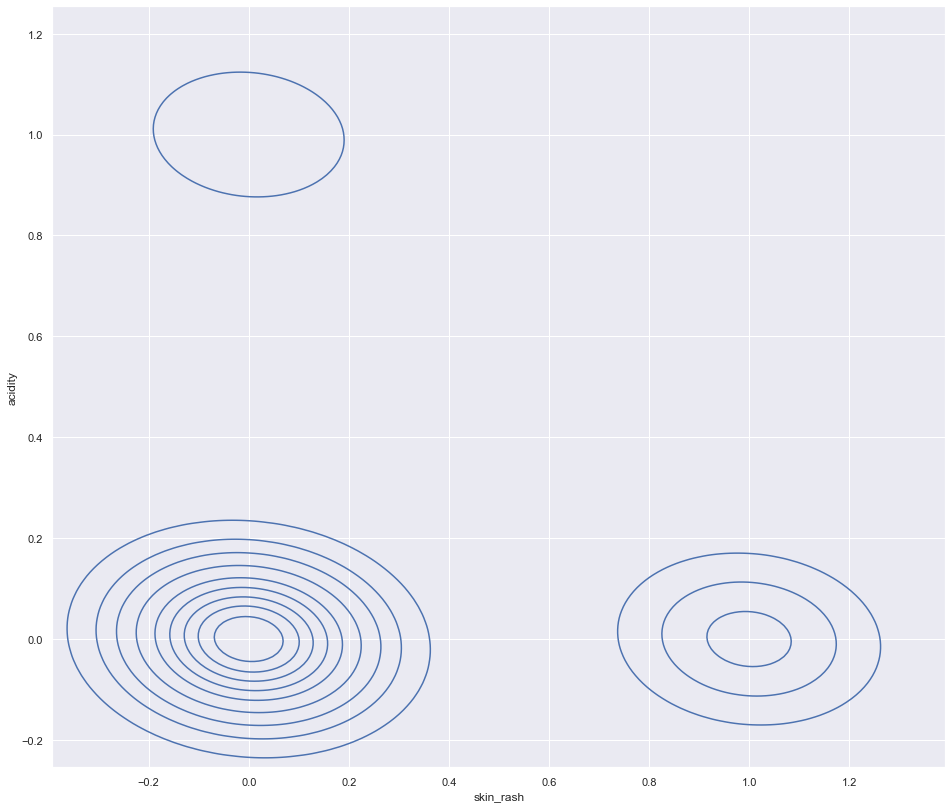

In [22]:
plt.figure(figsize=(16,14))
sns.kdeplot(df.skin_rash, df.acidity)

# Training The Dataset

In [233]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [234]:
x=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [235]:
x.head()

skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
itching                                                                    
1                1                     1                    0          0   
1                0                     1                    0          0   
1                1                     0                    0          0   
1                1                     1                    0          0   
0                0                     0                    1          1   

         chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
itching                                                                
1             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
0             1           0             0        0                 0   

         muscle_wasting  ...  pus_filled_pimples  blackheads  scurring  \
itching                  ...                                             
1                     0  ...                   0           0         0   
1                     0  ...                   0           0         0   
1                     0  ...                   0           0         0   
1                     0  ...                   0           0         0   
0                     0  ...                   0           0         0   

         skin_peeling  silver_like_dusting  small_dents_in_nails  \
itching                                                            
1                   0                    0                     0   
1                   0                    0                     0   
1                   0                    0                     0   
1                   0                    0                     0   
0                   0                    0                     0   

         inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  
itching                                                                        
1                         0        0                     0                  0  
1                         0        0                     0                  0  
1                         0        0                     0                  0  
1                         0        0                     0                  0  
0                         0        0                     0                  0  

[5 rows x 131 columns]

In [236]:
y.head()

itching
1    Fungal infection
1    Fungal infection
1    Fungal infection
1    Fungal infection
0             Allergy
Name: prognosis, dtype: object

# Splitting the Dataset into Training and Testing Phase

In [237]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

# Fitting the Dataset into various models:-

# Support Vector Machine

In [238]:
def svm_classifier(x_train,x_test,y_train,y_test):

    classifier_svm=SVC(kernel='poly', random_state=0)
    classifier_svm.fit(x_train,y_train)

    y_predict=classifier_svm.predict(x_test)

    cm=confusion_matrix(y_test,y_predict)

    return print(f"Train Score : {classifier_svm.score(x_train,y_train)}\nTest Score : {classifier_svm.score(x_test,y_test)}")

# KNN(K- Nearest Neighbours)

In [239]:
def knn_classifier(x_train,x_test,y_train,y_test):
    classifier_knn=KNeighborsClassifier(metric = 'minkowski',p=2)
    classifier_knn.fit(x_train,y_train)
    
    y_predict=classifier_knn.predict(x_test)
    
    cm=confusion_matrix(y_test,y_predict)
    
    return print(f"Train Score : {classifier_knn.score(x_train,y_train)}\nTest Score : {classifier_knn.score(x_test,y_test)}")

# Decision Tree Algorithm

In [240]:
def tree_classifier(x_train,x_test,y_train,y_test):
    classifier_tree=DecisionTreeClassifier(criterion = 'gini',random_state=0,splitter='best')
    classifier_tree.fit(x_train,y_train)
    
    y_predict=classifier_tree.predict(x_test)
    
    cm=confusion_matrix(y_test,y_predict)
    
    return print(f"Train Score : {classifier_tree.score(x_train,y_train)}\nTest Score : {classifier_tree.score(x_test,y_test)}")

# Random Forest Algorithm

In [241]:
def forest_classifier(x_train,x_test,y_train,y_test):
    classifier_forest=RandomForestClassifier(criterion = 'gini',random_state=0)
    classifier_forest.fit(x_train,y_train)
    
    y_predict=classifier_forest.predict(x_test)
    
    cm=confusion_matrix(y_test,y_predict)
    
    return print(f"Train Score : {classifier_forest.score(x_train,y_train)}\nTest Score : {classifier_forest.score(x_test,y_test)}")

In [243]:
def print_score(x_train, x_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(x_train,x_test,y_train,y_test)
    
    print("-"*100)
    print()
    
    print("KNN:\n")
    knn_classifier(x_train,x_test,y_train,y_test)
    
    print("-"*100)
    print()
    
    print("Decision tree:\n")
    tree_classifier(x_train,x_test,y_train,y_test)
    
    print("-"*100)
    print()
    
    print("Random Forest:\n")
    forest_classifier(x_train,x_test,y_train,y_test)

In [244]:
print_score(x_train,x_test,y_train,y_test)

SVM:

Train Score : 0.8403361344537815
Test Score : 0.75
----------------------------------------------------------------------------------------------------

KNN:

Train Score : 0.9831932773109243
Test Score : 0.9
----------------------------------------------------------------------------------------------------

Decision tree:

Train Score : 1.0
Test Score : 0.7166666666666667
----------------------------------------------------------------------------------------------------

Random Forest:

Train Score : 1.0
Test Score : 1.0


In [250]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
knn= KNeighborsClassifier(n_neighbors=5)
svm=SVC(kernel='sigmoid')
dt=DecisionTreeClassifier(criterion='gini')
rf=RandomForestClassifier(n_estimators=100, bootstrap= True)

In [251]:
log.fit(x_train,y_train)
knn.fit(x_train,y_train)
svm.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [252]:
y_log=log.predict(x_test)
y_knn=knn.predict(x_test)
y_svm=svm.predict(x_test)
y_dt=dt.predict(x_test)
y_rf=rf.predict(x_test)

In [253]:
log_cm_test=confusion_matrix(y_test,y_log)
knn_cm_test=confusion_matrix(y_test,y_knn)
svm_cm_test=confusion_matrix(y_test,y_svm)
dt_cm_test=confusion_matrix(y_test,y_dt)
rf_cm_test=confusion_matrix(y_test,y_rf)

# Compare the Accuracy score on the basis of Barplot

In [254]:
from sklearn.metrics import accuracy_score
log_acc_test=accuracy_score(y_test,y_log)
knn_acc_test=accuracy_score(y_test,y_knn)
svm_acc_test=accuracy_score(y_test,y_svm)
dt_acc_test=accuracy_score(y_test,y_dt)
rf_acc_test=accuracy_score(y_test,y_rf)

In [255]:
print("Accuracy Scores:\n")

print('-------Logistic Regression-------\n')
print(log_acc_test,'\n')

print('-------K- Nearest Neighbour-------\n')
print(knn_acc_test,'\n')

print('-------SVM-------\n')
print(svm_acc_test,'\n')

print('-------Decision Tree Classifier-------\n')
print(dt_acc_test,'\n')

print('-------Random Forest Classifier-------\n')
print(rf_acc_test,'\n')

Accuracy Scores:

-------Logistic Regression-------

1.0 

-------K- Nearest Neighbour-------

0.9 

-------SVM-------

0.9166666666666666 

-------Decision Tree Classifier-------

0.7166666666666667 

-------Random Forest Classifier-------

1.0 



<ipython-input-256-cf6b18bb3c6f>:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(y_pos,performance,width,align='center',alpha=1,color='rbgy')


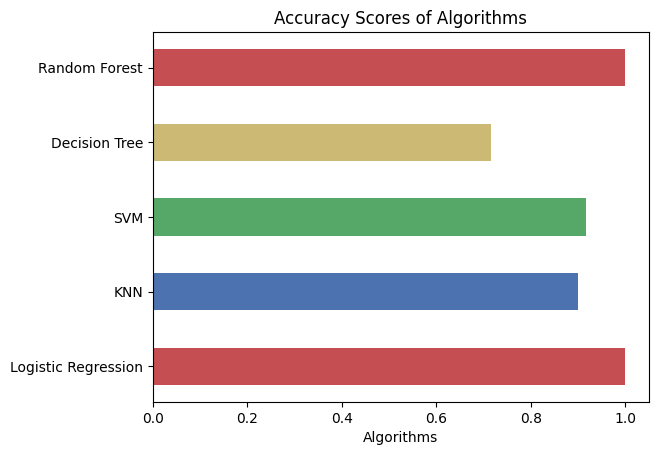

In [256]:
acc_list=[log_acc_test,knn_acc_test,svm_acc_test,dt_acc_test,rf_acc_test]

import matplotlib.pyplot as plt; plt.rcdefaults()

objects=('Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest')
y_pos=np.arange(len(objects))
performance= acc_list
width=1/2
plt.barh(y_pos,performance,width,align='center',alpha=1,color='rbgy')
plt.yticks(y_pos,objects)
plt.xlabel('Accuracy')
plt.xlabel('Algorithms')
plt.title('Accuracy Scores of Algorithms')
plt.show()

# Performance

In [263]:
classifier_forest= RandomForestClassifier(criterion='entropy')
classifier_forest.fit(x_train,y_train)
y_predict=classifier_forest.predict(x_test)

cm=confusion_matrix(y_test,y_predict)
cm

array([[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0,

In [264]:
pd.crosstab(y_test,y_predict,rownames=['True'],colnames=['Predicted'],margins= True)

Predicted                     Alcoholic hepatitis  Allergy  Bronchial Asthma  \
True                                                                           
Alcoholic hepatitis                             3        0                 0   
Allergy                                         0        3                 0   
Bronchial Asthma                                0        0                 2   
Chicken pox                                     0        0                 0   
Chronic cholestasis                             0        0                 0   
Dengue                                          0        0                 0   
Diabetes                                        0        0                 0   
Dimorphic hemmorhoids(piles)                    0        0                 0   
Drug Reaction                                   0        0                 0   
GERD                                            0        0                 0   
Gastroenteritis                                 0        0                 0   
Heart attack                                    0        0                 0   
Hepatitis B                                     0        0                 0   
Hepatitis C                                     0        0                 0   
Hepatitis E                                     0        0                 0   
Hypertension                                    0        0                 0   
Hyperthyroidism                                 0        0                 0   
Hypoglycemia                                    0        0                 0   
Hypothyroidism                                  0        0                 0   
Impetigo                                        0        0                 0   
Jaundice                                        0        0                 0   
Malaria                                         0        0                 0   
Migraine                                        0        0                 0   
Osteoarthristis                                 0        0                 0   
Peptic ulcer diseae                             0        0                 0   
Pneumonia                                       0        0                 0   
Psoriasis                                       0        0                 0   
Tuberculosis                                    0        0                 0   
Urinary tract infection                         0        0                 0   
Varicose veins                                  0        0                 0   
hepatitis A                                     0        0                 0   
All                                             3        3                 2   

Predicted                     Chicken pox  Chronic cholestasis  Dengue  \
True                                                                     
Alcoholic hepatitis                     0                    0       0   
Allergy                                 0                    0       0   
Bronchial Asthma                        0                    0       0   
Chicken pox                             2                    0       0   
Chronic cholestasis                     0                    1       0   
Dengue                                  0                    0       1   
Diabetes                                0                    0       0   
Dimorphic hemmorhoids(piles)            0                    0       0   
Drug Reaction                           0                    0       0   
GERD                                    0                    0       0   
Gastroenteritis                         0                    0       0   
Heart attack                            0                    0       0   
Hepatitis B                             0                    0       0   
Hepatitis C                             0                    0       0   
Hepatitis E                             0                    0       0   
Hypertension         

# Find the Accuracy ,precision, recall and F1-score

In [266]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report

In [267]:
print(classification_report(y_test,y_predict))

                              precision    recall  f1-score   support

         Alcoholic hepatitis       1.00      1.00      1.00         3
                     Allergy       1.00      1.00      1.00         3
            Bronchial Asthma       1.00      1.00      1.00         2
                 Chicken pox       1.00      1.00      1.00         2
         Chronic cholestasis       1.00      1.00      1.00         1
                      Dengue       1.00      1.00      1.00         1
                   Diabetes        1.00      1.00      1.00         1
Dimorphic hemmorhoids(piles)       1.00      1.00      1.00         2
               Drug Reaction       1.00      1.00      1.00         1
                        GERD       1.00      1.00      1.00         2
             Gastroenteritis       1.00      1.00      1.00         1
                Heart attack       1.00      1.00      1.00         2
                 Hepatitis B       1.00      1.00      1.00         1
                 He

# THANK YOU